# animation

This is a simple example of animation of jumping ball.
The animation can be stopped by "restart kernel" button on the above menu.

In [1]:
#require "core" ;;
#require "async" ;;
#require "cairo2" ;;
#require "iocaml-kernel" ;;

/home/opam/.opam/4.04.1/lib/base/caml: added to search path
/home/opam/.opam/4.04.1/lib/base/caml/caml.cma: loaded
/home/opam/.opam/4.04.1/lib/base/shadow_stdlib: added to search path
/home/opam/.opam/4.04.1/lib/base/shadow_stdlib/shadow_stdlib.cma: loaded
/home/opam/.opam/4.04.1/lib/sexplib/0: added to search path
/home/opam/.opam/4.04.1/lib/sexplib/0/sexplib0.cma: loaded
/home/opam/.opam/4.04.1/lib/base: added to search path
/home/opam/.opam/4.04.1/lib/base/base.cma: loaded
/home/opam/.opam/4.04.1/lib/ocaml/unix.cma: loaded
/home/opam/.opam/4.04.1/lib/ocaml/bigarray.cma: loaded
/home/opam/.opam/4.04.1/lib/fieldslib: added to search path
/home/opam/.opam/4.04.1/lib/fieldslib/fieldslib.cma: loaded
/home/opam/.opam/4.04.1/lib/ppx_compare/runtime-lib: added to search path
/home/opam/.opam/4.04.1/lib/ppx_compare/runtime-lib/ppx_compare_lib.cma: loaded
/home/opam/.opam/4.04.1/lib/sexplib: added to search path
/home/opam/.opam/4.04.1/lib/sexplib/sexplib.cma: loaded
/home/opam/.opam/4.04.1/l

In [2]:
open Core ;;
open Async ;;

In [3]:
Thread.create (fun () -> never_returns (Scheduler.go ())) () ;; (* Start the Async scheduler. *)

- : Core.Thread.t = <abstr>

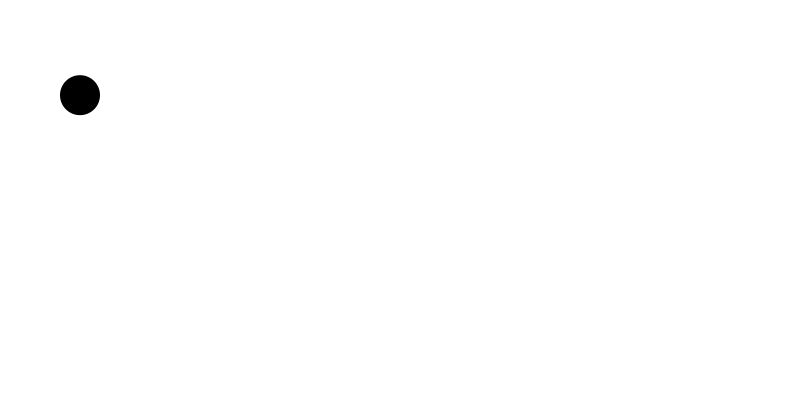

In [4]:
let pi2 = 2.0 *. 3.14159265358979 ;;
let w = 800. ;;
let h = 400. ;;
let r = 20.0 ;;
let e = -0.9 ;;
let g = 1.0 ;; (* gravity *)
let m = 1.0 ;; (* mass *)

let plot_ball ~context x y =
  let surface = Cairo.Image.create Cairo.Image.ARGB32 ~width:800 ~height:400 in
  let ctx = Cairo.create surface in
  Cairo.arc ctx ~x ~y ~r ~a1:0.0 ~a2:pi2 ;
  Cairo.fill ctx ;
  Cairo.PNG.write_to_stream ~output:(Caml.output_string Iocaml.mime) surface  ;
  Iocaml.send_clear ~context () ;
  Iocaml.send_mime ~context ~base64:true "image/png"
;;

let context = Iocaml.cell_context() ;;
let _ =
  let rec aux x y vx vy () =
    let x, vx = if x < 0.0 then (0.0, e *. vx) else if x > w then (w, e *. vx) else (x +. vx, vx) in
    let y, vy = if y < 0.0 then (0.0, e *. vy) else if y > h then (h, e *. vy) else (y +. vy, vy +. m *. g) in
    plot_ball ~context x y ;
    Async.after (Time.Span.of_ms 10.0) >>= aux x y vx vy
  in
  aux 0.0 0.0 10.0 0.0 ()